# Word2Vec
### **Mateo Serrato Ascencio**

In [1]:
#importamos librerías
import numpy as np
from sklearn.decomposition import PCA  
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
from gensim.models import KeyedVectors


In [3]:
model = KeyedVectors.load_word2vec_format('GNvectors.bin',binary=True)

## Características del Data set GNVectors de Google
### 1) El data set con el que fue entrenada esta red tenía 1 billón de palabras
### 2) El vocabulario fue de 692 mil palabras únicas
### 3) Cada palabra es representada en 300 dimensiones (tamaño de la capa oculta)


In [4]:
def pp(obj):
    print(pd.DataFrame(obj))

In [5]:
pp(model['table'])

            0
0   -0.144531
1   -0.026489
2    0.117676
3    0.213867
4   -0.042236
..        ...
295 -0.076660
296  0.069824
297 -0.095215
298 -0.098145
299 -0.012268

[300 rows x 1 columns]


In [6]:
pp(model['orange'])

            0
0   -0.104980
1   -0.182617
2    0.099121
3    0.263672
4   -0.196289
..        ...
295 -0.100586
296  0.064941
297 -0.025635
298  0.135742
299  0.075195

[300 rows x 1 columns]


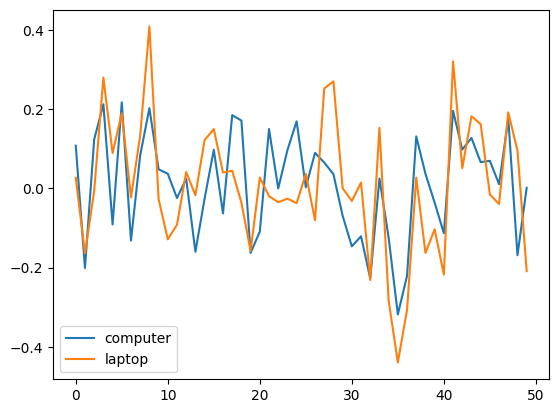

In [7]:
plt.plot(model['computer'][:50], label = 'computer')
plt.plot(model['laptop'][:50],label = 'laptop')
#plt.plot(model['cake'][:50],label = 'cake')
plt.legend()



In [8]:
model.most_similar(positive=['puto'])

[('suman', 0.7690806984901428),
 ('bibingka', 0.7493224143981934),
 ('tocino', 0.7379883527755737),
 ('siopao', 0.7274445295333862),
 ('pansit', 0.7272148132324219),
 ('longganisa', 0.7262921929359436),
 ('laing', 0.725810170173645),
 ('pancit', 0.7220222353935242),
 ('halo_halo', 0.721583366394043),
 ('kare_kare', 0.7200902104377747)]

## Composicionalidad con operaciones lineales entre vectores

In [9]:
pp(model.most_similar(positive=['Germany','airline']))

                              0         1
0                     Lufthansa  0.735891
1                      airlines  0.637675
2  Deutsche_Lufthansa_AG_LHA.XE  0.621131
3                   Germanwings  0.618648
4                   Air_Polonia  0.608465
5                  Lufthansa_AG  0.600566
6                           ČSA  0.593416
7               Lufthansa_Cargo  0.592121
8         Deutsche_Lufthansa_AG  0.589482
9                     Eurowings  0.584023


In [10]:
pp(model.most_similar(positive=['Mexico','airline']))

                      0         1
0               Aeromar  0.662186
1  Mexicana_de_Aviacion  0.660330
2            Aeromexico  0.652928
3       carrier_Volaris  0.620648
4       airline_Volaris  0.612004
5              airlines  0.608610
6          Viva_Aerobus  0.603608
7               Volaris  0.601621
8            Aeroméxico  0.596508
9     Troubled_Mexicana  0.593978


In [11]:
model.most_similar(positive=['greatest','boxer'])

[('hardest_punchers', 0.6323189735412598),
 ('boxing', 0.6263673901557922),
 ('hardest_puncher', 0.616895854473114),
 ('boxers', 0.6119935512542725),
 ('heavyweight_boxer', 0.6095820069313049),
 ('Sandy_Saddler', 0.5988210439682007),
 ('heavyweight_champion', 0.5893554091453552),
 ('Clones_Cyclone', 0.5803837776184082),
 ('Boom_Boom_Mancini', 0.5769422650337219),
 ('Jimmy_McLarnin', 0.5762878060340881)]

## Solving analogies
 
* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [12]:
model.most_similar(negative=['man','plural'], positive=['woman','king'])

[('queen', 0.47849828004837036),
 ('princess', 0.39136093854904175),
 ('monarch', 0.3744722008705139),
 ('royal_palace', 0.35306063294410706),
 ('empress', 0.35023757815361023),
 ('Princess', 0.345473051071167),
 ('prince', 0.33934229612350464),
 ('King_Norodom_Sihanouk', 0.3329695761203766),
 ('crown_prince', 0.33219847083091736),
 ('Prince_Norodom_Sihamoni', 0.3192463219165802)]

In [13]:
model.most_similar(negative=['Italy'], positive=['rome','France'])

[('france', 0.5716239213943481),
 ('paris', 0.5538392066955566),
 ('je_suis', 0.5200055241584778),
 ('alors', 0.5175790190696716),
 ('vous', 0.5149635076522827),
 ('french', 0.5116703510284424),
 ('histoire', 0.5104295611381531),
 ('armstrong', 0.5092106461524963),
 ('pas', 0.5081389546394348),
 ('le', 0.5080370903015137)]

In [14]:
target_words = [line.strip().lower() for line in open("4000-most-common-english-words-csv.csv")][:2000]
words = [word for word in target_words if word in model] 
target_matrix = np.array([model[word] for word in words])
 
from tsne import tsne
reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1997...
Computing P-values for point 500 of 1997...
Computing P-values for point 1000 of 1997...
Computing P-values for point 1500 of 1997...
Mean value of sigma: 0.574225
Iteration 10: error is 20.976474
Iteration 20: error is 20.417314
Iteration 30: error is 19.274277
Iteration 40: error is 19.610298
Iteration 50: error is 19.612158
Iteration 60: error is 19.543734
Iteration 70: error is 19.545051
Iteration 80: error is 19.576061
Iteration 90: error is 19.621835
Iteration 100: error is 19.635143
Iteration 110: error is 2.914661
Iteration 120: error is 2.412816
Iteration 130: error is 2.185919
Iteration 140: error is 2.051113
Iteration 150: error is 1.956604
Iteration 160: error is 1.886624
Iteration 170: error is 1.831618
Iteration 180: error is 1.787067
Iteration 190: error is 1.751100
Iteration 200: error is 1.721721
Iteration 210: error is 1.697554
Iteration 220: error is 1.677328

## Constelación de palabras

In [26]:
max_x = np.amax(reduced_matrix,axis=0)[0]
max_y = np.amax(reduced_matrix,axis=0)[1]

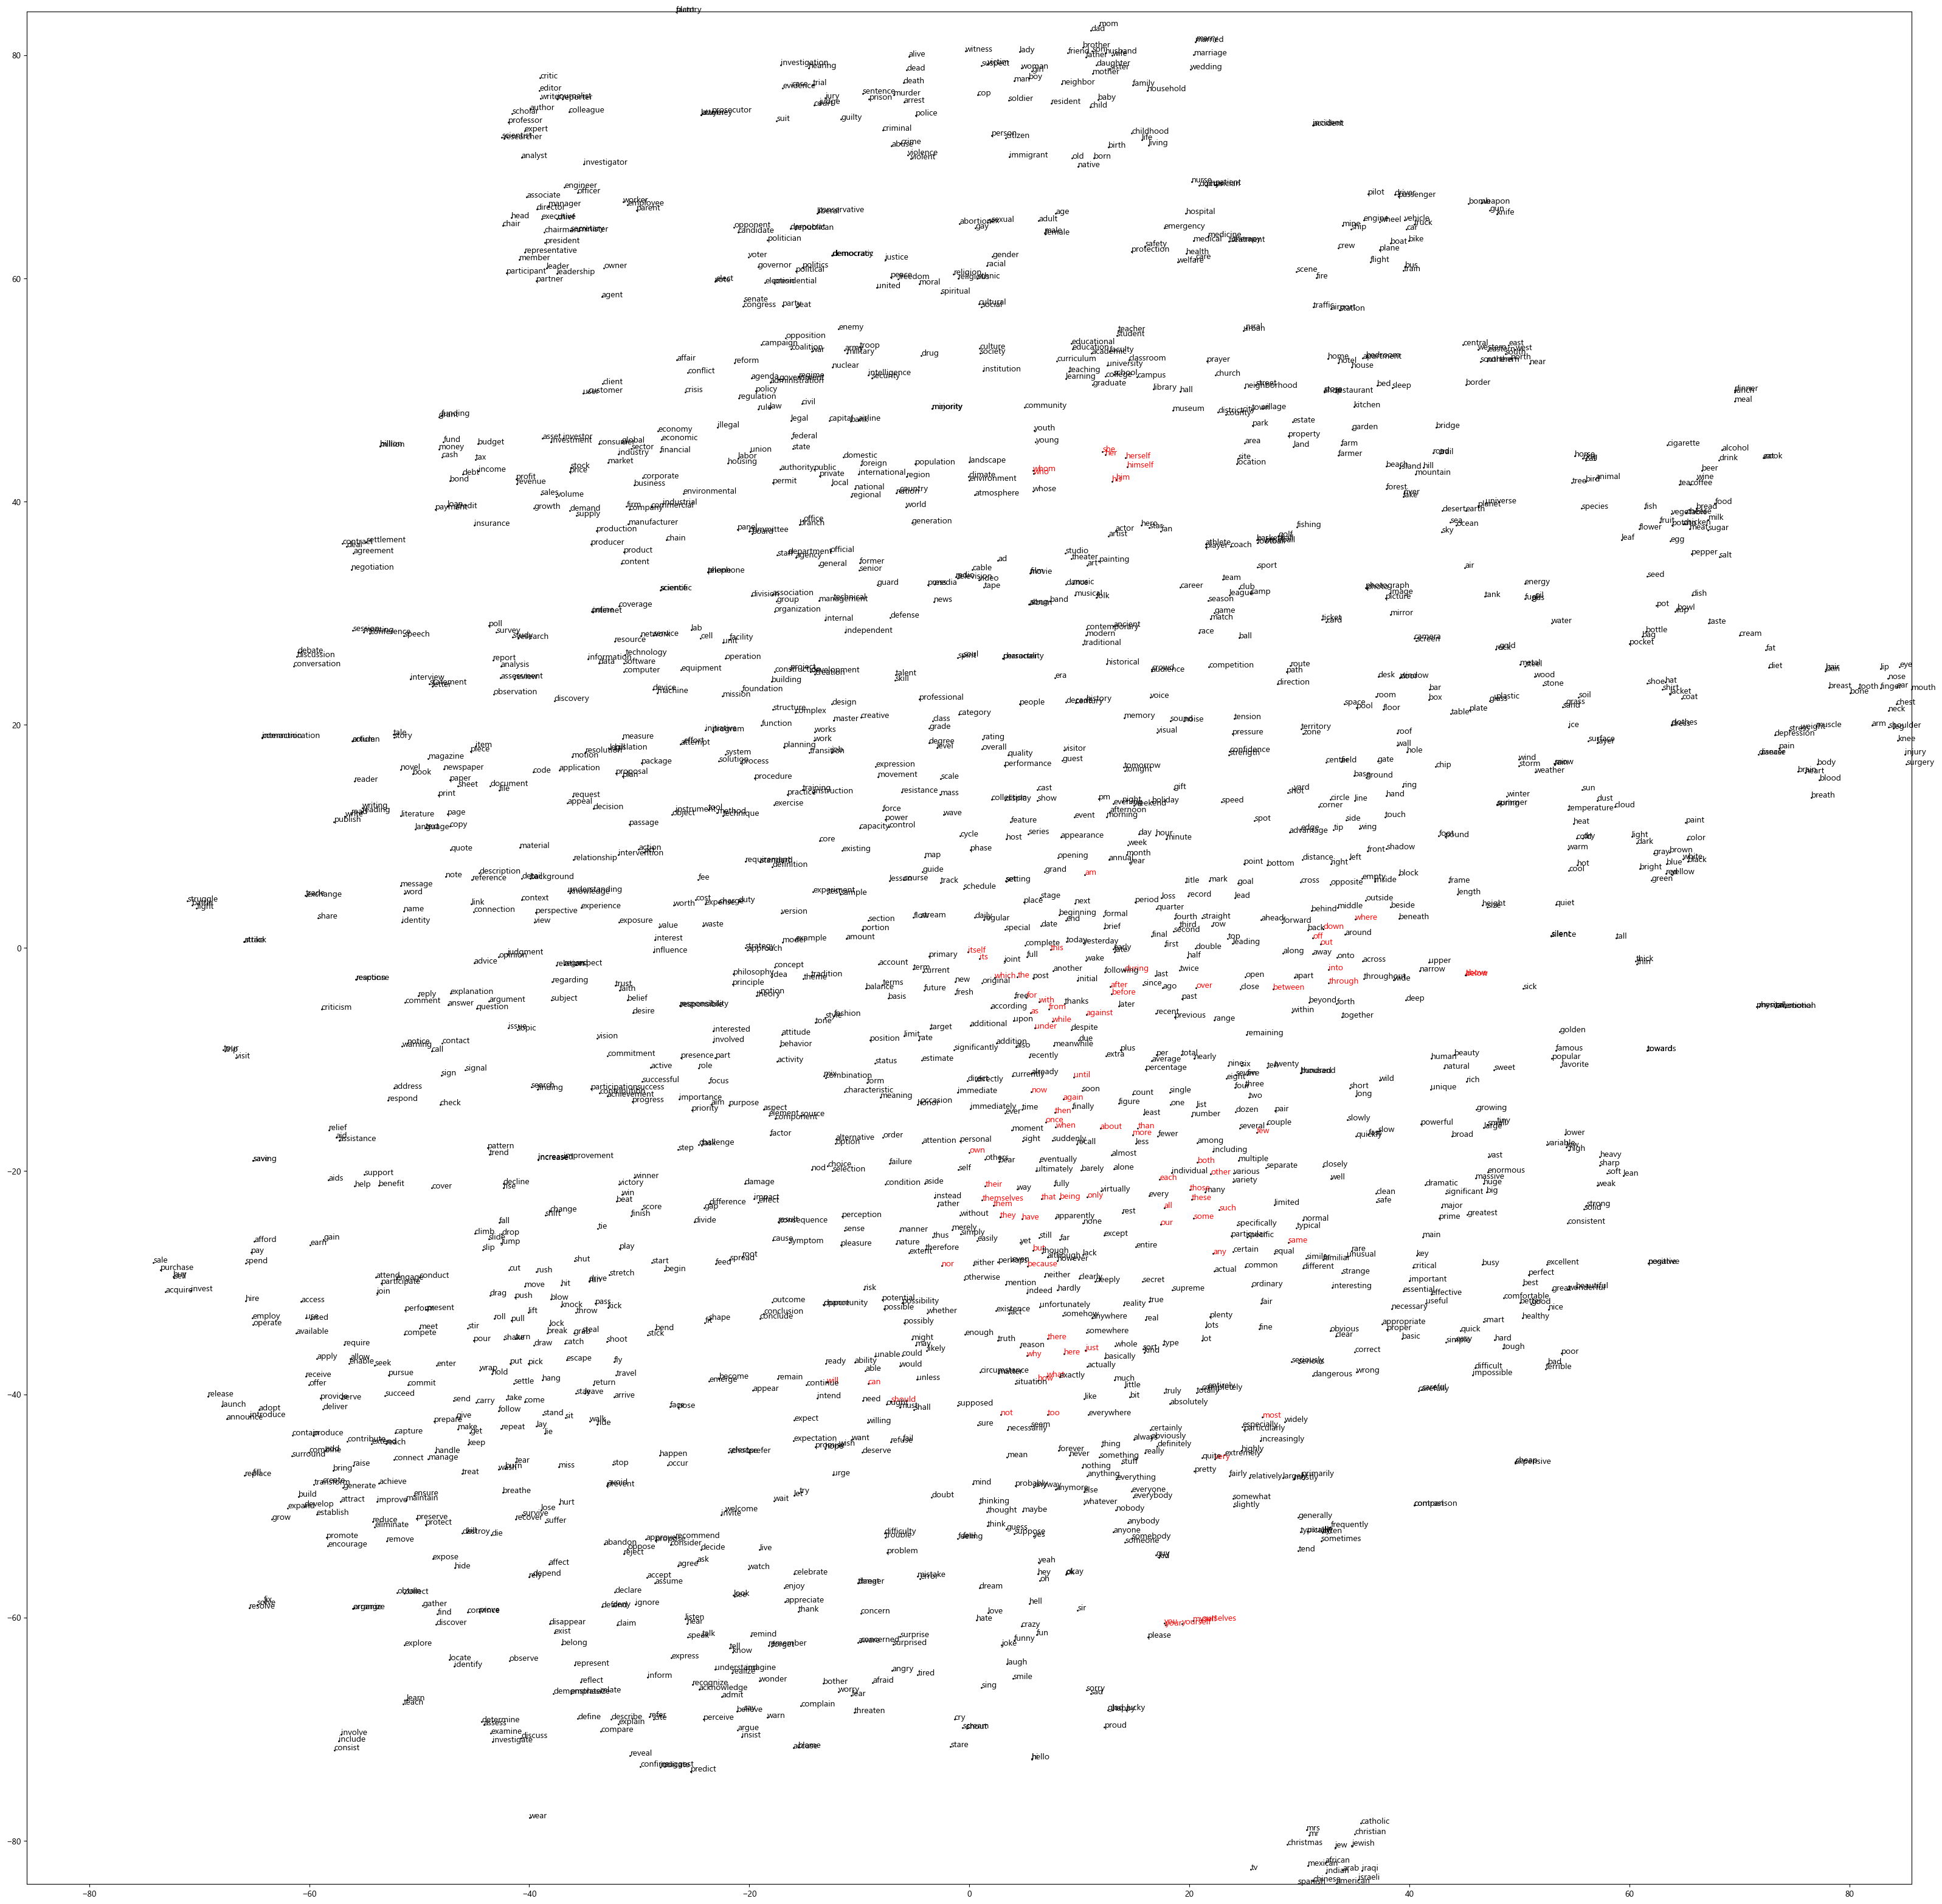

In [28]:
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.figure(figsize=(40,40),dpi=100)
plt.xlim((-max_x,max_x))
plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:,0],reduced_matrix[:,1],1, color = 'black')

from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
for idx, word in enumerate(words[:]):
    #coords para pintar la palabra
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    

    if word in sw:
        plt.annotate(word,(x,y),color = 'red')

    else:
        plt.annotate(word,(x,y),color = 'black')

In [50]:
from sklearn.decomposition import PCA
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    plt.xlim((min(data[:,0]), max(data[:,0])))
    plt.ylim((min(data[:,1]), max(data[:,1])))
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(int(len(data)/2)):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+int(len(data)/2)],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )


In [51]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]


In [55]:
countries = ['USA', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']
languages = [analogy('Mexico', 'spanish', country) for country in countries]
pp(zip(countries,languages))

           0           1
0        USA     english
1   Colombia     Spanish
2     Brazil  portuguese
3  Venezuela  Venezuelan
4     France      french
5      Spain     Spanish
6      Egypt    egyptian
7      China     chinese


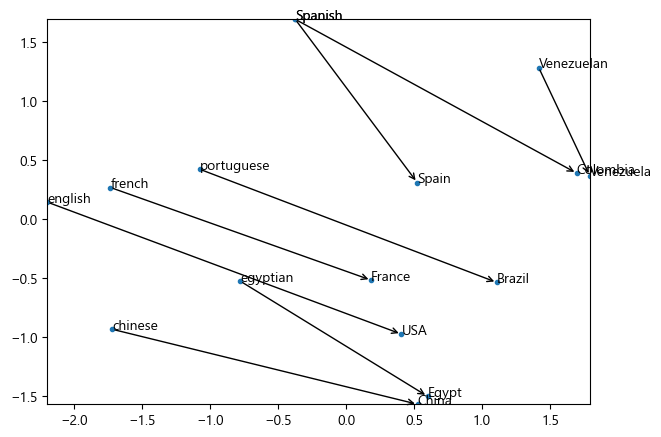

In [57]:
labels = countries + languages
data = [model[word] for word in labels]
plot_data(data, labels)

Veo muchas palabras agrupadas de manera diferente respecto a las prácticas previas, se percibe un mucho mejor acomodo y clasificación de las palabras respecto a sus similares en cuanto a contexto. Esto se lo atribuyo a la manera en la que fueron obtenidos los vectores. En este caso se está utilizando el modelo GNvectors.bin, que corresponde a los vectores preentrenados de Google News. disho modelo fue entrenado con una ventana de contexto de tamaño 5, es decir, se consideran hasta 5 palabras a la izquierda y 5 a la derecha de la palabra central para obtener su vector correspondiente.

Por ejemplo aqui se agrupan mucho mejor las stopwords, "she, he, herself, himself" salen juntas, mientras que en tcor "ella,el" aparecian en contextos diferentes